# Homework 6

##### Data: HW6_data.csv

**Harvard University**<br>
**Fall 2018**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Saturday, October 20th, 2018 at 11:59pm

**Instructions:**

- Upload your final answers in the form of a Jupyter notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

### Collaborators

** Place the name of everyone who's submitting this assignment here**

<div class="answer-separator">
------------------------
</div>

In [1]:
import numpy as np
import scipy.stats
import scipy.special

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm
import pandas as pd
%matplotlib inline

from scipy.stats import norm, uniform
import seaborn as sns

## Question 1: Can I sample from F-R-I-E-N-D-S without rejection?  It's Important!

**Coding required**


*Haven't we made it obvious?* In HW 5 we were introduced to $X$ a random variable with distribution described by the following pdf:

$$
f_X(x) = \begin{cases}
\frac{1}{12}(x-1), &1\leq x\leq 3\\
-\frac{1}{12}(x-5), &3< x\leq 5\\
\frac{1}{6}(x-5), &5< x\leq 7\\
-\frac{1}{6}(x-9), &7< x\leq 9\\
0, &otherwise
\end{cases}
$$

*Haven't we made it clear?*  We were also introduced to $h$ the following function of $X$:

$$h(X) = \frac{1}{3\sqrt{2}\pi}\mathrm{exp}\left\{ -\frac{1}{18}\left( X - 5\right)^2\right\}$$


*Want us to spell it out for you?* Compute $\mathbb{E}[h(X)]$ via Monte Carlo simulation using the following sampling methods:

**1.1.** Rejection sampling with a normal proposal distribution and appropriately chosen parameters (aka rejection on steroids)

**1.2.** Importance sampling with a uniform proposal distribution

**1.3.** Importance sampling with a normal proposal distribution and appropriately chosen parameters

--

**1.4.** So far (in HWs 5 and 6) we've computed estimates of $\mathbb{E}[h(X)]$ for the following list of methods:

* Inverse Transform Sampling
* Rejection Sampling with a uniform proposal distribution (rejection sampling in a rectangular box with uniform probability of sampling any x)
* Rejection sampling with a normal proposal distribution and appropriately chosen parameters (aka rejection on steroids)
* Importance sampling with a uniform proposal distribution
* Importance sampling with a normal proposal distribution and appropriately chosen parameters.

Compute the variance of each estimate of $\mathbb{E}[h(X)]$ you calculated in this list. Which sampling methods and associated proposal distributions would you expect based on discussions from lecture to have resulted in lower variances? How well do your results align with these expectations?

**Gratuitous Titular Reference**:  Annemarie and Marshmello's [F-R-I-E-N-D-S](https://www.youtube.com/watch?v=CY8E6N5Nzec) samples from French Hip Hop artist Rapsa's [42 Mesures à ta Sa(i)nté](https://www.youtube.com/watch?v=JivaoPSAgLI) a homage to his hometown of Saint-Étienne.

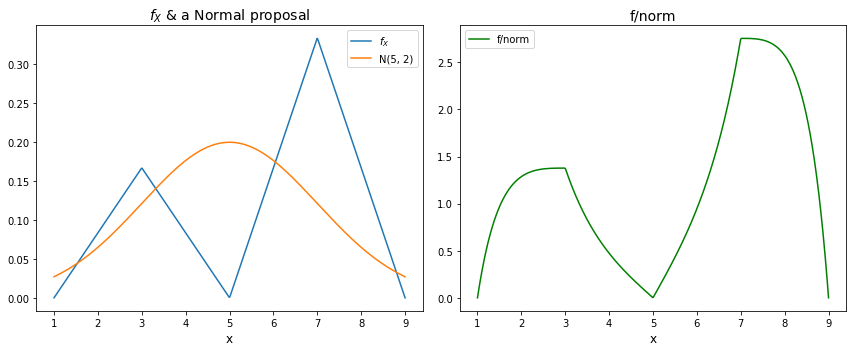

In [2]:
# 1.1
def f_pdf(x):
    if x < 1: return 0
    if x >= 1 and x <= 3: return 1/12*(x-1)
    if x > 3 and x <= 5: return -1/12*(x-5)
    if x > 5 and x <= 7: return 1/6*(x-5)
    if x > 7 and x <= 9: return -1/6*(x-9)
    return 0

def h(x):
    return 1/(3*np.sqrt(2)*np.pi) * np.exp(-1/18*(x-5)**2)

x_min, x_max = 1, 9
x_lin = np.linspace(x_min, x_max, 500)
f_lin = np.array([f_pdf(xi) for xi in x_lin])
norm_mu = 5
norm_std = 2
norm_lin = np.array([norm.pdf(xi, norm_mu, norm_std) for xi in x_lin])

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(x_lin, f_lin, label=r'$f_X$')
ax[0].plot(x_lin, norm_lin, label='N({}, {})'.format(norm_mu, norm_std))
ax[1].plot(x_lin, f_lin/norm_lin, c='g', label='f/norm')
ax[0].set_title(r'$f_X$ & a Normal proposal', fontsize=14)
ax[1].set_title('f/norm', fontsize=14)
ax[0].set_xlabel('x', fontsize=12)
ax[1].set_xlabel('x', fontsize=12)
ax[0].legend()
ax[1].legend()
plt.tight_layout()

In [3]:
# E[h] from rejection sampling
M = np.max(f_lin/norm_lin)
M

2.7551540356113637

Total: Count = 2540, Accepted = 1000


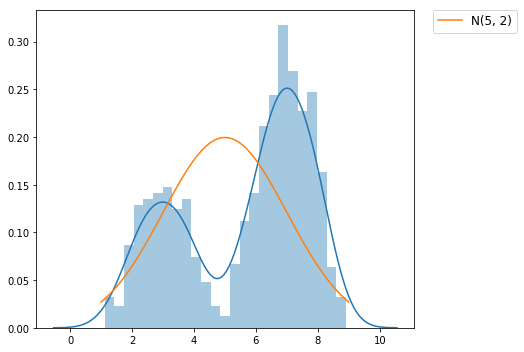

In [22]:
N = 1000
accepted = 0
rej_samps = np.zeros(N)
count = 0

while (accepted < N):
    while 1:
        xproposal = norm(norm_mu, norm_std).rvs()
        if xproposal > x_min and xproposal < x_max:
            break
    y = np.random.uniform(0,1)
    
    if y < f_pdf(xproposal)/(M*norm.pdf(xproposal, loc=norm_mu, scale=norm_std)):
        rej_samps[accepted] = xproposal
        accepted += 1
    count +=1
    if count % 100 == 0:
        print('accepted = {}, count = {}'.format(accepted, count), end='\r')
    
print("Total: Count = {}, Accepted = {}".format(count, accepted))


fig, ax = plt.subplots(1, 1, figsize=(6, 5))
sns.distplot(rej_samps, bins=25, ax=ax)
ax.plot(x_lin, norm_lin, label='N({}, {})'.format(norm_mu, norm_std))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)
plt.tight_layout()

In [5]:
expec_h_rej = np.array([h(xi) for xi in rej_samps]).mean()
expec_h_rej

0.058592502548727006

In [6]:
# 1.2 E[h] from importance sampling - uniform proposal
f_by_unif = lambda x: f_pdf(x) * (x_max - x_min)

unif_samps = np.random.uniform(low=1, high=9, size=(N,))
print(unif_samps.shape)

h_unif_samps = np.array([h(ui) for ui in unif_samps])
f_by_unif_samps = np.array([f_by_unif(ui) for ui in unif_samps])

expec_h_imp_unif = (h_unif_samps * f_by_unif_samps).mean()
expec_h_imp_unif /= f_by_unif_samps.mean()
expec_h_imp_unif

(1000,)


0.05864273255254468

In [7]:
# 1.3 E[h] from importance sampling - normal proposal
f_by_norm = lambda x: f_pdf(x) / norm.pdf(x, norm_mu, norm_std)

norm_samps = norm.rvs(loc=norm_mu, scale=norm_std, size=N)
norm_samps = norm_samps[(norm_samps < x_max) & (norm_samps > x_min)]
while(norm_samps.shape[0] < N):
    new_norm_samps = norm.rvs(loc=norm_mu, scale=norm_std, size=N - norm_samps.shape[0])
    norm_samps = np.append(norm_samps, new_norm_samps)
print(norm_samps.shape)

h_norm_samps = np.array([h(ni) for ni in norm_samps])
f_by_norm_samps = np.array([f_by_norm(ni) for ni in norm_samps])

expec_h_imp_norm = (h_norm_samps * f_by_norm_samps).mean()
expec_h_imp_norm /= f_by_norm_samps.mean()
expec_h_imp_norm

(1000,)


0.05893840764213355

In [12]:
# 1.4 Variance Comparison
def f_inv_cdf(y):
    if y < 0 or y > 1: raise Exception('y must be within (0, 1).')
    if y <= 1/6: return np.sqrt(24*y) + 1
    if y > 1/6 and y <= 1/3: return 5 - np.sqrt(8 - 24*y)
    if y > 1/3 and y <= 2/3: return 5 + np.sqrt(12*y - 4)
    if y > 2/3 and y <= 1: return 9 - np.sqrt(12 - 12*y)
    return 1


def inv_samp_Eh(x_min, x_max, N):
    y_unif = np.random.uniform(0, 1, N)
    x_inv_samp = np.array([f_inv_cdf(yi) for yi in y_unif]) 
    expec_h_inv_samp = np.array([h(xi) for xi in x_inv_samp]).mean()
    return expec_h_inv_samp


def rej_samp_Eh_unif(x_min, x_max, N):
    y_max = 0.4
    accepted = 0
    x_rej_samp = np.zeros(N)
    count = 0
    while (accepted < N):
        x = np.random.uniform(x_min, x_max) # x ~ uniform[xmin, xmax)
        y = np.random.uniform(0, y_max) # y ~ uniform[0, ymax)
        if y < f_pdf(x):
            x_rej_samp[accepted] = x
            accepted += 1
        count +=1
#         if count % 100 == 0:
#             print('REJ_UNIF | accepted = {}, count = {}'.format(accepted, count), end='\r')
#     print("REJ_UNIF | Total: Count = {}, Accepted = {}".format(count, accepted))
    
    expec_h_rej_unif = np.array([h(xi) for xi in x_rej_samp]).mean()
    return expec_h_rej_unif


def rej_samp_Eh_norm(x_min, x_max, mu, std, N):
    accepted = 0
    x_rej_samp = np.zeros(N)
    count = 0
    while (accepted < N):
        while 1:
            xproposal = norm(mu, std).rvs()
            if xproposal > x_min and xproposal < x_max:
                break
        y = np.random.uniform(0,1)
        if y < f_pdf(xproposal)/(M*norm.pdf(xproposal, loc=mu, scale=std)):
            x_rej_samp[accepted] = xproposal
            accepted += 1
        count +=1
#         if count % 100 == 0:
#             print('REJ_NORM | accepted = {}, count = {}'.format(accepted, count), end='\r')
#     print("REJ_NORM | Total: Count = {}, Accepted = {}".format(count, accepted))
    
    expec_h_rej_norm = np.array([h(xi) for xi in x_rej_samp]).mean()
    return expec_h_rej_norm


def imp_samp_Eh_unif(x_min, x_max, N):
    unif_samps = np.random.uniform(low=x_min, high=x_max, size=(N,))
    h_unif_samps = np.array([h(ui) for ui in unif_samps])
    f_by_unif_samps = np.array([f_by_unif(ui) for ui in unif_samps])

    expec_h_imp_unif = (h_unif_samps * f_by_unif_samps).mean()
    expec_h_imp_unif /= f_by_unif_samps.mean()
    return expec_h_imp_unif


def imp_samp_Eh_norm(x_min, x_max, mu, std, N):
    norm_samps = norm.rvs(loc=mu, scale=std, size=N)
    norm_samps = norm_samps[(norm_samps < x_max) & (norm_samps > x_min)]
    while(norm_samps.shape[0] < N):
        new_norm_samps = norm.rvs(loc=norm_mu, scale=norm_std, size=N - norm_samps.shape[0])
        norm_samps = np.append(norm_samps, new_norm_samps)
    
    h_norm_samps = np.array([h(ni) for ni in norm_samps])
    f_by_norm_samps = np.array([f_by_norm(ni) for ni in norm_samps])

    expec_h_imp_norm = (h_norm_samps * f_by_norm_samps).mean()
    expec_h_imp_norm /= f_by_norm_samps.mean()
    return expec_h_imp_norm

In [14]:
n_sim = 1000
Eh_inv_res = []
for k in range(n_sim):
    Eh_inv_res.append(inv_samp_Eh(x_min, x_max, N))
    print(k, end='\r')

print(np.mean(Eh_inv_res), np.std(Eh_inv_res))

0.05885703064073106 0.0003176194621134672


In [15]:
Eh_rej_unif_res = []
for k in range(n_sim):
    Eh_rej_unif_res.append(rej_samp_Eh_unif(x_min, x_max, N))
    print(k, end='\r')

print(np.mean(Eh_rej_unif_res), np.std(Eh_rej_unif_res))

0.058856071752815084 0.0003284833298851761


In [16]:
Eh_rej_norm_res = []
for k in range(n_sim):
    Eh_rej_norm_res.append(rej_samp_Eh_norm(x_min, x_max, norm_mu, norm_std, N))
    print(k, end='\r')

print(np.mean(Eh_rej_norm_res), np.std(Eh_rej_norm_res))

0.05886135730693531 0.0003272581639835764


In [17]:
Eh_imp_unif_res = []
for k in range(n_sim):
    Eh_imp_unif_res.append(imp_samp_Eh_unif(x_min, x_max, N))
    print(k, end='\r')

print(np.mean(Eh_imp_unif_res), np.std(Eh_imp_unif_res))

0.05886358584484702 0.0003120544956190216


In [20]:
Eh_imp_norm_res = []
for k in range(n_sim):
    Eh_imp_norm_res.append(imp_samp_Eh_norm(x_min, x_max, norm_mu, norm_std, N))
    print(k, end='\r')

print(np.mean(Eh_imp_norm_res), np.std(Eh_imp_norm_res))

0.05886195494669101 0.0003600814277707178


<div class="answer-separator">
------------------------
</div>

## Question 2: Mr. Poe Writes of Gradient Descent Into the Maelström`

Suppose you are building a pricing model for laying down telecom cables over a geographical region. You construct a pricing model that takes as input a pair of coordinates, $(x_1, x_2)$ and based upon two parameters $\lambda_1, \lambda_2$ predicts the loss in revenue corresponding to laying the cables at the inputed location.  Your pricing model is described by the following equation:

$$
\mathcal{L}(x_1, x_2\ \vert\ \lambda_1, \lambda_2) = 0.000045\lambda_2^2 x_2 - 0.000098\lambda_1^2 x_1 + 0.003926\lambda_1 x_1\exp\left\{\left(x_2^2 - x_1^2\right)\left(\lambda_1^2 + \lambda_2^2\right)\right\}
$$

We've provided you some data contained in the file `HW6_data.csv`. This data represents a set of coordinates configured on the curve $x_2^2 - x_1^2 = -0.1$. Your general goal for this problem is to find the parameters $\lambda_1, \lambda_2$ that  minimize the net loss over the entire dataset.

**2.1.** Construct an appropriate visualization of the loss function for the given data.  Use that visualization to verify that for $\lambda_1 = 2.05384, \lambda_2 = 0$, the loss function $L$ is minimized.  Your visualization should make note of this optima.

**2.2.** Choose an appropriate learning rate  from [10, 1, 0.1, 0.01, 0.001, 0.0001] and use that learning rate to implement gradient descent.  Use your implementation to minimize $L$ for the given data.  Your implementation should be stored in a function named `gradient_descent`.  `gradient_descent` should take the following parameters (n represents the number of data points):

- `lambda_init` -- a numpy array with shape (2 , 1) containing the initial value for $\lambda_1$ and $\lambda_2$
- `X_data` -- an numpy array with shape (n, 2) containing the data coordinates used in your loss function
- `step_size` -- a float containing the step-size/learning rate used in your algorithm
- `scale` -- a float containing the factor by which you'll scale your step_size (or alternatively your loss) in the algorithm
- `max_iterations` -- an integer containing a cap on the number of iterations for which you'll let your algorithm run
- `precision` -- a float containing the difference in loss between consecutive iterations below which you'll stop the algorithm
- `loss` -- a function (or lambda function) that takes in the following parameters and returns a float with the results of calculating the loss function for our data at $\lambda_1$ and $\lambda_2$
    - `lambdas` -- a numpy array with shape (2, 1) containing $\lambda_1$ and $\lambda_2$
    - `X_data` -- the same as the parameter `X_data` for `gradient_descent`
    
The return value for `gradient_descent` should be a dictionary with the following keys (n_itertions represents the total number of iterations):
- 'lambdas' -- the associated value is a numpy array with shape (2,1) containing the optimal $\lambda$'s found by the algorithm
- 'history' -- the associated value is a numpy array with shape (n_iterations,) containing a history of the calculated value of the loss function at each iteration


**2.3** For your implementation in 2.2, create a plot of loss vs iteration.  Does your descent algorithm comverge to the right values of $\lambda$?  At what point does your implementation converge?

**2.4.** Choose an appropriate learning rate  from [10, 1, 0.1, 0.01, 0.001, 0.0001] and use that learning rate to implement stochastic gradient descent.  Use your implementation to minimize $L$ for the given data.  Your implementation should a stored in a function named `stochastic_gradient_descent`.  `stochastic_gradient_descent` should take the following parameters (n represents the number of data points):

- `lambda_init` -- a numpy array with shape (2 , 1) containing the initial value for $\lambda_1$ and $\lambda_2$
- `X_data` -- an numpy array with shape (n, 2) containing the data coordinates for your loss function
- `step_size` -- a float containing the step-size/learning rate used in your algorithm
- `scale` -- a float containing the factor by which you'll scale your step_size (or alternatively your loss) in the algorithm
- `max_iterations` -- an integer containing a cap on the number of iterations for which you'll let your algorithm run
- `precision` -- a float containing the difference in loss between consecutive iterations below which you'll stop the algorithm
- `loss` -- a function (or lambda function) that takes in the following parameters and returns a float with the results of calculating the loss function for our data at $\lambda_1$ and $\lambda_2$
    - `lambdas` -- a numpy array with shape (2, 1) containing $\lambda_1$ and $\lambda_2$
    - `X_data` -- the same as the parameter `X_data` for `stochastic_gradient_descent`
    
The return value for `stochastic_gradient_descent` should be a dictionary with the following keys (n_itertions represents the total number of iterations):
- 'lambdas' -- the associated value is a numpy array with shape (2,1) containing the optimal $\lambda$'s found by the algorithm
- 'history' -- the associated value is a numpy array with shape (n_iterations,) containing a history of the calculated value of the loss function at each iteration


**2.5** For your implementation in 2.4, create a plot of loss vs iteration.  Does your descent algorithm comverge to the right values of $\lambda$?  At what point does your implementation converge?

**2.6** Compare the average time it takes to update the parameter estimation in each iteration of the two implementations. Which method is faster? Briefly explain why this result should be expected.

**2.7** Compare the number of iterations it takes for each algorithm to obtain an estimate accurate to `1e-3`.  You may wish to set a cap for maximum number of iterations.  Which method converges to the optimal point in fewer iterations?  Briefly explain why this result should be expected.

**2.8** Compare the performance of stochastic gradient descent on our loss function and dataset for the following learning rates: [10, 1, 0.1, 0.01, 0.001, 0.0001]. Based on your observations, briefly describe the effect of the choice of learning rate on the performance of the algorithm.

**2.9** Using your implementation of gradient descent and stochastic gradient descent, document the behavior of your two algorithms for the following starting points, and for a number of stepsizes of your choice:

- $(\lambda_1, \lambda_2) = (-2.47865, 0)$
- $(\lambda_1, \lambda_2) = (-3, 0)$
- $(\lambda_1, \lambda_2) = (-5, 0)$
- $(\lambda_1, \lambda_2) = (-10, 0)$

Construct a mathematical analysis of the loss function $\mathcal{L}$ to explain results of your descent algorithms at different starting points.

**Gratuitous Titular Reference**:  The renowned American auteur Edgar Allen Poe penned ["A Descent into the Maelström"](https://en.wikipedia.org/wiki/A_Descent_into_the_Maelstr%C3%B6m), a macabre tale of a seemingly elderly man's surviving a previous horrendous encounter with a massive hurricane, a shipwreck and a sea vortex, in 1841.

<div class="answer-separator">
------------------------
</div>